# Języki Programowania Python i R


## dr inż. Patryk Jasik
### Division of Theoretical Physics and Quantum Information
### Institute of Physics and Computer Science
### Faculty of Applied Physics and Mathematics
### Gdansk University of Technology

# scikit-learn docs
## https://scikit-learn.org/stable/

In [1]:
#%config Completer.use_jedi = False

**Regression** - is an approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

2D problem\
$$
y_i = a*x_i + b
$$


Multidimensional problem\
$$
y_i = a_1*x_{i1} + a_2*x_{i2} + ... + a_p*x_{ip} + intercept
$$

In [2]:
#loading the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
#measurements of physical and chemical properties of Portuguese Vinho Verde wines (white and red) 
wine = pd.read_csv("data/winequality-all.csv", comment="#")
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red


In [4]:
type(wine)

pandas.core.frame.DataFrame

In [6]:
#helpful information about the dataset that can be saved as variables
wine.shape

(5320, 13)

In [7]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         5320 non-null   float64
 1   volatile.acidity      5320 non-null   float64
 2   citric.acid           5320 non-null   float64
 3   residual.sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free.sulfur.dioxide   5320 non-null   float64
 6   total.sulfur.dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  response              5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


In [9]:
#the color of the wine is of type object, so we need to change this variable to a categorical one
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         5320 non-null   float64 
 1   volatile.acidity      5320 non-null   float64 
 2   citric.acid           5320 non-null   float64 
 3   residual.sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free.sulfur.dioxide   5320 non-null   float64 
 6   total.sulfur.dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  response              5320 non-null   int64   
 12  color                 5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.2 KB


In [10]:
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,4,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,3,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,4,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,5,white


In [11]:
#basic statistics
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,3.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,3.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,4.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,4.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,7.000000


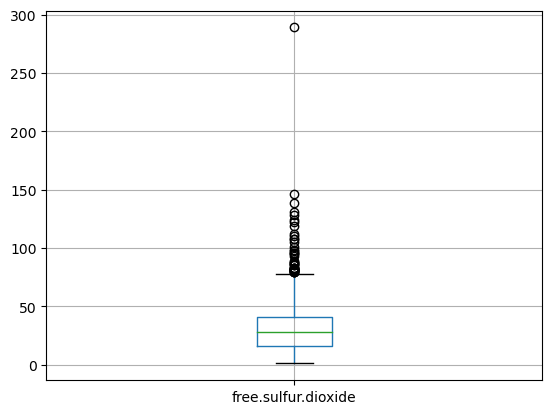

In [18]:
pd.DataFrame(wine['free.sulfur.dioxide']).boxplot()
plt.show()

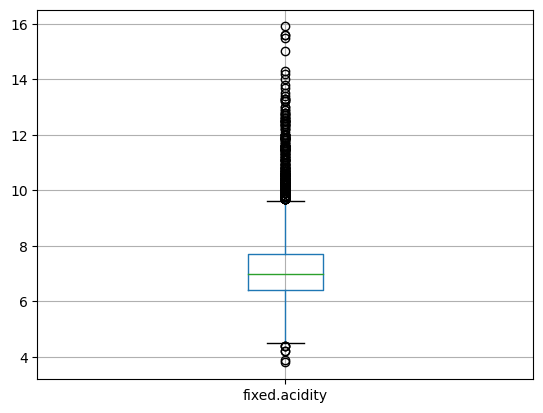

In [19]:
pd.DataFrame(wine['fixed.acidity']).boxplot()
plt.show()

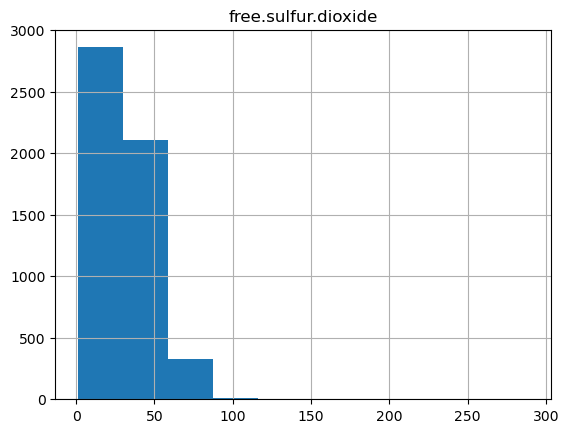

In [17]:
pd.DataFrame(wine['free.sulfur.dioxide']).hist()
plt.show()

In [20]:
wine.describe(include='all')

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3961
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,3.795677,NaN
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,1.000000,NaN
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,3.000000,NaN
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,4.000000,NaN
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,4.000000,NaN


### goal - we will check whether alcohol is a function of the remaining 10 variables and what is the relationship.
### Thanks to this, we will be able to explain the derivative of what set of factors the given alcohol content is, as well as predict the alcohol content in the newly produced batch of wine.

In [21]:
#we check how many red wines and how many white wines are in our collection
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [22]:
#We check how the statistics for red and white wines differ

#creation of the subsets
white_wine = wine[wine.color == 'white']
red_wine = wine[wine.color == 'red']

In [23]:
white_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,3.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,3.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,4.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,4.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,7.000000


In [24]:
red_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,3.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,3.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,4.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,4.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,6.000000


In [34]:
white_wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [36]:
#the target variable
y = white_wine.iloc[:, -3] # alcohol is -3 column, zmienna celu
y.head(10)

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
1364    11.0
1365    12.0
1366     9.7
1367    10.8
1368    12.4
Name: alcohol, dtype: float64

In [37]:
y.tail(10)

5310     9.2
5311     9.4
5312    11.8
5313    10.6
5314     9.7
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, dtype: float64

In [38]:
#predictors
X = white_wine.iloc[:, :-3] # od poczatku do -3 (bez alkocholu), predyktor
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47


In [39]:
X.shape

(3961, 10)

# Correlation Study

An important element in statistical analysis is the study of the correlation of variables. It is thanks to it that we know if there is any relationship between the data sets.

It is very important to investigate the correlation when building a regression model. By examining the correlation of our goal (in this example 'alcohol') with the features, we can find out which of the featues is the most important and which will not help us create the appropriate model.

The most frequently studied correlations are:
 - <a href = https://en.wikipedia.org/wiki/Pearson_correlation_coefficient> **Pearson** </a> - examines the linear relationship in the X and Y data
 
$$
r_{p}= \frac{cov(X,Y)}{\sigma_X \sigma_Y}
$$

 - <a href = https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient> **Spearman** </a> - examines the rank dependence of X and Y data. A high value of the correlation coefficient does not mean that the data is linearly correlated, but as the value of X increases, the values of Y increase, but not necessarily always by the same value
 
 $$
 r_s = \frac{cov(R(X)R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}
 $$
 
*where*:
 
 $cov()$ - covariance, 
 
 $\sigma$ - standard deviation
 
 $R()$ - data rank

In [40]:
#let's calculate the Pearson's linear correlation coefficients
corr_P = white_wine.corr("pearson")
corr_P.shape

/tmp/ipykernel_86/3309651364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_P = white_wine.corr("pearson")


(12, 12)

In [43]:
# help(white_wine.corr()) # strasznie duzo tekstu wypisuje

In [44]:
corr_P

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
fixed.acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile.acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric.acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual.sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free.sulfur.dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total.sulfur.dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


In [54]:
np.triu(np.ones(12), k=1) # k - wplywa na diagonal macierzy trojkatnej (triu)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
#we create a triangular matrix and display a correlation coefficients greater than 0.4 zeby wyciac duplikaty
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=bool), k=1)).stack().sort_values() # stack przeksztalca w stack, sort sotruje
corr_P_tri

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        alcohol                -0.398167
chlorides             alcohol                -0.356928
                                                ...   
residual.sugar        total.sulfur.dioxide    0.409583
alcohol               response                0.462869
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
Length: 66, dtype: float64

In [55]:
corr_P_tri[abs(corr_P_tri)>0.4] # tylko te ze wsplczynnikiem korelacji >0.4

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        total.sulfur.dioxide    0.409583
alcohol               response                0.462869
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

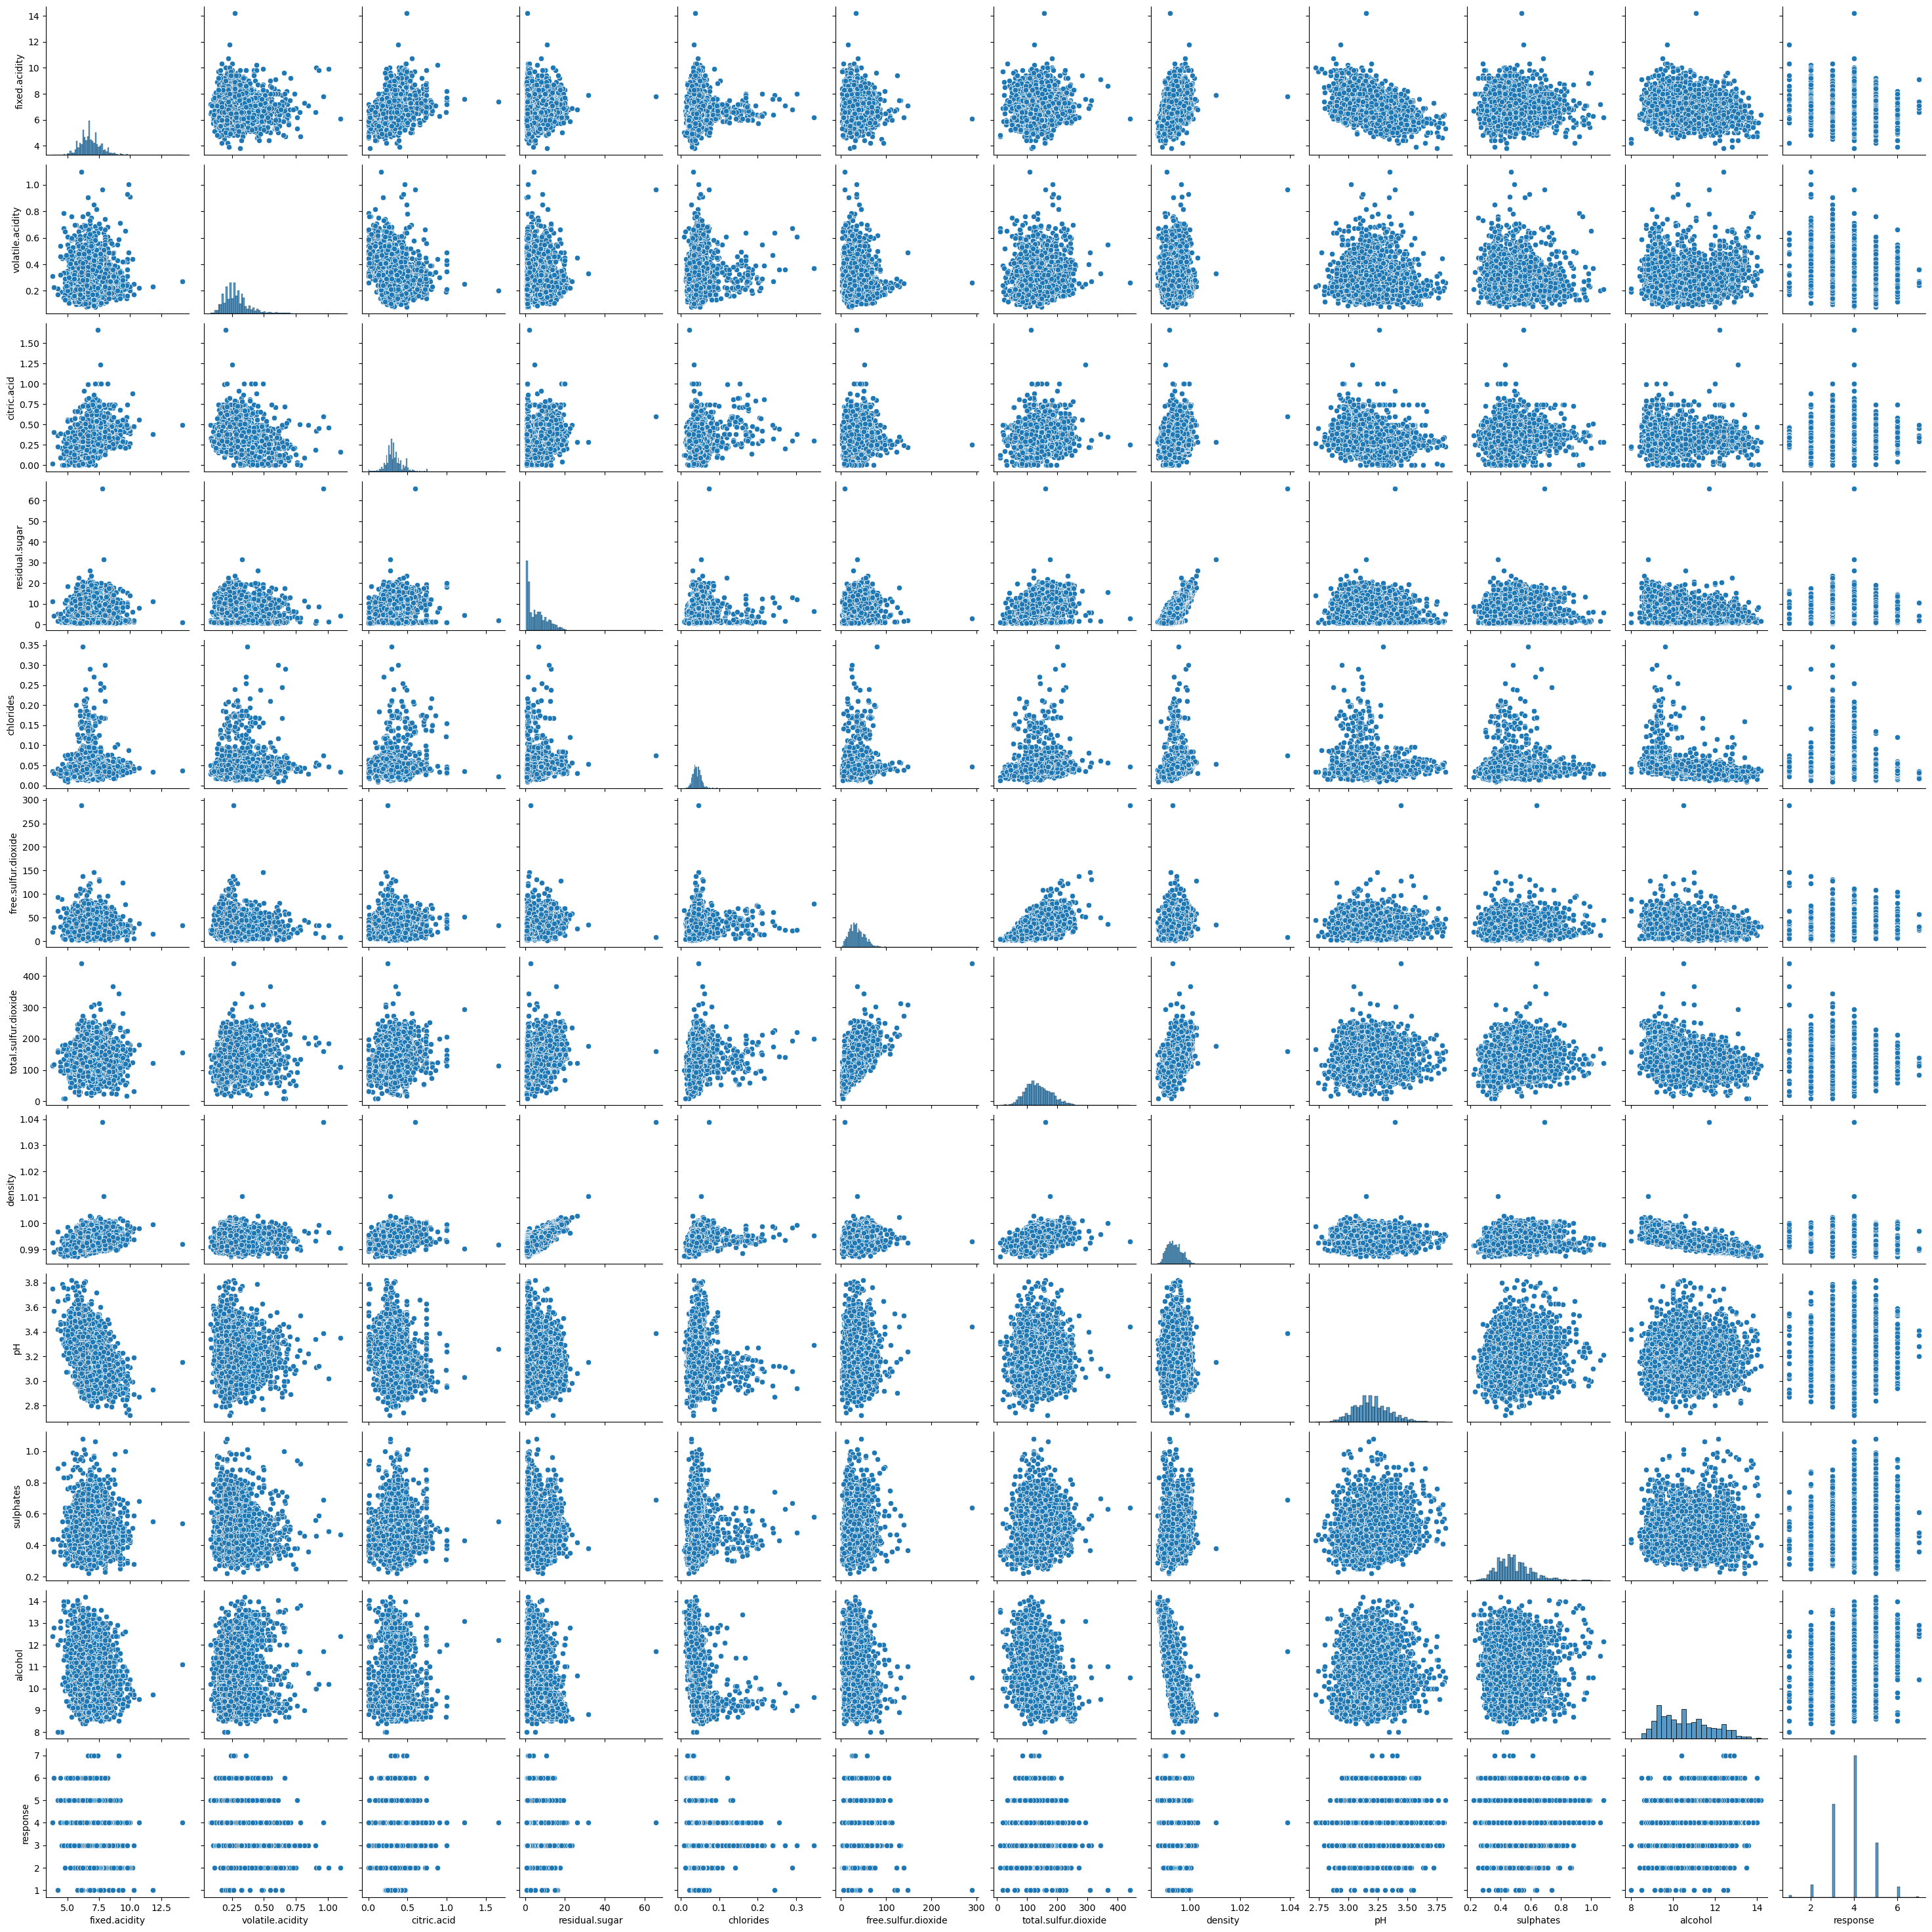

In [56]:
# visualization of correlation using seaborn pairplot figure
sns.pairplot(white_wine)
plt.show()

In [57]:
#let's calculate the Spearman's correlation coefficients
corr_S = white_wine.corr("spearman")
corr_S.shape

/tmp/ipykernel_86/2419133988.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_S = white_wine.corr("spearman")


(12, 12)

In [58]:
corr_S

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
fixed.acidity,1.000000,-0.037328,0.308689,0.092093,0.090136,-0.035506,0.096047,0.263979,-0.420407,-0.007606,-0.087765,-0.094236
volatile.acidity,-0.037328,1.000000,-0.161104,0.145917,0.017037,-0.089430,0.132091,0.037931,-0.062852,-0.007954,0.013266,-0.185385
citric.acid,0.308689,-0.161104,1.000000,0.030789,0.047333,0.084318,0.089576,0.099580,-0.169143,0.062574,-0.034389,0.030293
residual.sugar,0.092093,0.145917,0.030789,1.000000,0.191767,0.345052,0.431846,0.743296,-0.153187,0.000744,-0.378605,-0.092462
chlorides,0.090136,0.017037,0.047333,0.191767,1.000000,0.165546,0.368464,0.500773,-0.033579,0.099878,-0.565509,-0.333089
free.sulfur.dioxide,-0.035506,-0.089430,0.084318,0.345052,0.165546,1.000000,0.619998,0.322096,-0.017051,0.031688,-0.270173,0.032555
total.sulfur.dioxide,0.096047,0.132091,0.089576,0.431846,0.368464,0.619998,1.000000,0.568226,-0.002188,0.156994,-0.473471,-0.202576
density,0.263979,0.037931,0.099580,0.743296,0.500773,0.322096,0.568226,1.000000,-0.080766,0.103765,-0.808451,-0.382900
pH,-0.420407,-0.062852,-0.169143,-0.153187,-0.033579,-0.017051,-0.002188,-0.080766,1.000000,0.130640,0.119420,0.136190
sulphates,-0.007606,-0.007954,0.062574,0.000744,0.099878,0.031688,0.156994,0.103765,0.130640,1.000000,-0.060261,0.035592


In [59]:
#we create a triangular matrix and display an absolute of correlation coefficients is greater than 0.4
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype=bool), k=1)).stack().sort_values()
corr_S_tri[abs(corr_S_tri)>0.4]

density               alcohol                -0.808451
chlorides             alcohol                -0.565509
total.sulfur.dioxide  alcohol                -0.473471
fixed.acidity         pH                     -0.420407
residual.sugar        total.sulfur.dioxide    0.431846
alcohol               response                0.475713
chlorides             density                 0.500773
total.sulfur.dioxide  density                 0.568226
free.sulfur.dioxide   total.sulfur.dioxide    0.619998
residual.sugar        density                 0.743296
dtype: float64

In [63]:
import ydata_profiling

In [62]:
#we create a linear regression model
import sklearn.linear_model
lm = sklearn.linear_model.LinearRegression()

In [64]:
lm

LinearRegression()

In [ ]:
help(sklearn.linear_model.LinearRegression())

In [ ]:
lm

In [ ]:
#let's train linear model
lm.fit(X,y)

In [ ]:
#coefficients of the linear model
lm.coef_

In [ ]:
X.columns

In [ ]:
#intercept
lm.intercept_

In [ ]:
X.describe()

In [ ]:
#the mean value of the target variable
y.mean()

In [ ]:
x_new = X.mean().values.reshape(1,-1)
x_new

In [ ]:
#let's do prediction for the mean value of all predictors
lm.predict(x_new+0.001)

In [ ]:
#for a standardized dataset, the regression coefficients gain a useful interpretation
#i.e. the greater the value of the coefficient's modulus,
#the more significant it has an impact on the value of the objective variable
X_std = (X-X.mean(axis=0))/X.std(axis=0) # axis=0 => columns
X_std.describe()

In [ ]:
lm_std = sklearn.linear_model.LinearRegression()
lm_std.fit(X_std, (y-y.mean())/y.std())

In [ ]:
pd.Series(np.abs(lm_std.coef_), index=X.columns.to_list()).round(4).sort_values(ascending=False)

In [ ]:
# assessment of the quality of the model
# compare the fitted values calculated by the model with the original values
y_pred = lm.predict(X)
y_pred[0:15]

In [ ]:
y[0:15]

In [ ]:
#R2 - determination coefficient
lm.score(X,y)

In [ ]:
sklearn.metrics.r2_score(y,y_pred)

In [ ]:
#MAE
sklearn.metrics.mean_absolute_error(y,y_pred)

In [ ]:
#MSE
sklearn.metrics.mean_squared_error(y,y_pred)

In [ ]:
#RMSE
sklearn.metrics.mean_squared_error(y,y_pred, squared=False)

In [ ]:
help(sklearn.metrics.mean_squared_error)

In [ ]:
#MAPE
sklearn.metrics.mean_absolute_percentage_error(y,y_pred)*100

In [ ]:
# we care about the model's good predictive ability
#but we also make sure not to overfit the model,
#so we divide the dataset into a training dataset (80%) and a test dataset (20%)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=12345)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#we will create a function that fits the linear regression model to a given sample
#and computes errors of prediction
def fit_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2 = sklearn.metrics.r2_score
    rmse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    
    return {
        "r_score_tr": r2(y_train, y_train_pred),
        "r_score_te": r2(y_test, y_test_pred),
        "RMSE_tr": rmse(y_train, y_train_pred, squared=False),
        "RMSE_te": rmse(y_test, y_test_pred, squared=False),
        "MAE_tr": mae(y_train, y_train_pred),
        "MAE_te": mae(y_test, y_test_pred)
    }

In [ ]:
#operation of the above function and results
params = ["Lin. Reg."]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_train,
                      X_test,
                      y_train,
                      y_test)]

results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
#let's change the random state
X_train_rs123, X_test_rs123, y_train_rs123, y_test_rs123 = sklearn.model_selection.train_test_split(
                                                                        X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=123)

In [ ]:
params.append("Lin. Reg. rs123")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_rs123, X_test_rs123, y_train_rs123, y_test_rs123))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
#let's change the size of the test dataset
X_train_70, X_test_70, y_train_70, y_test_70 = sklearn.model_selection.train_test_split(
                                                                        X,
                                                                        y,
                                                                        test_size=0.3,
                                                                        random_state=12345)

In [ ]:
params.append("Lin. Reg. test size 70")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_70, X_test_70, y_train_70, y_test_70))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)

In [ ]:
kf

In [ ]:
X.reset_index(drop=True)

In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kf, X_test_kf = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    display(X_train_kf)
    display(y_train_kf)
    display(X_test_kf)
    display(y_test_kf)

In [ ]:
#let's create a set of regression models
#we start with one model and we will add other models later on
methods = pd.Series({
    "lin_reg": sklearn.linear_model.LinearRegression()
})

In [ ]:
#evaluation function
def eval_function(X_train, X_test, y_train, y_test):
    cv_models = pd.concat([
        pd.Series(fit_regression(alg,
                                 X_train, X_test, y_train, y_test)) for alg in methods], axis=1).T
    cv_models.index = methods.index
    return cv_models

In [ ]:
#application of the evaluation function
#results summarizing the cross validation
from sklearn.model_selection import KFold

n_folds = 5

results_cv = [eval_function(X.iloc[train,:],
                            X.iloc[test,:],
                            y.iloc[train],
                            y.iloc[test]) for train, test in kf.split(X)]

sum(results_cv)/n_folds

In [ ]:
results_cv

In [ ]:
(sum(results_cv)/n_folds).to_dict()

In [ ]:
#we append the cross validation results to our main dataframe with all results
params.append(" ")
res.append( )
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
#cross validation could be done in a simpler way
from sklearn.model_selection import cross_validate

#scoring parameters 
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

cv_results = cross_validate(sklearn.linear_model.LinearRegression(),
                            X,
                            y,
                            scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'),
                            cv=5,
                            return_train_score=True)

In [ ]:
cv_results

In [ ]:
print("r_score_tr:", cv_results['train_r2'].mean().round(6))
print("r_score_te:", cv_results['test_r2'].mean().round(6))
print("RMSE_tr:", (cv_results['train_neg_root_mean_squared_error']*-1).mean().round(6))
print("RMSE_te:", (cv_results['test_neg_root_mean_squared_error']*-1).mean().round(6))
print("MAE_tr:", (cv_results['train_neg_mean_absolute_error']*-1).mean().round(6))
print("MAE_te:", (cv_results['test_neg_mean_absolute_error']*-1).mean().round(6))

## Introduction to statistical tests

<div class="alert alert-block alert-success">
   <b> Definitions </b>
    
**Statistical test** - a mathematical formula that allows you to estimate the probability of meeting a certain statistical hypothesis in a population based on a random sample from that population.
    
$\newline$

**Statistical hypothesis** - any assumption about the distribution of the population

$\newline$

**Null hypothesis $𝐻_0$** - Supposition we want to check with statistical tests.

$\newline$

**P-value** - the cumulative probability of drawing a sample of the same or more extreme as observed, assuming that the null hypothesis is true

</div>

<div class="alert alert-block alert-warning">
A certain threshold (<b>significance level</b> $\alpha$) is set when using statistical tests. If the P-value is less than this level, the null hypothesis can be rejected. Usually $\alpha$ = 0.05
</div>

<div class="alert alert-block alert-info">
    
Using P-value and significance level, we can reject the null hypothesis. However, this does not mean that we confirm the alternative hypothesis ($H_1$).
</div>

Using statistical tests, we can also check whether the data has a specific distribution.

So let's check if **pH** follow a normal distribution. We can do this with the <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html> *scipy.stats.normaltest()* </a> method.

The null hypothesis in this method is that the data is normally distributed.

Let us assume the significance level of $\alpha$ = 0.05. We can reject this hypothesis and say that **pH** is not normally distributed.

In [ ]:
from scipy.stats import normaltest, anderson

In [ ]:
white_wine.columns

In [ ]:
normaltest(white_wine['pH'])

In [ ]:
plt.hist(white_wine['pH'], bins = 20)

In [ ]:
#example of normal distribution
np.random.seed(42)
norm = [np.random.normal() for i in range(100000)]

In [ ]:
plt.hist(norm, bins = 20)

In [ ]:
normaltest(norm)

Let's check if the **pH** has a different distribution.

A method for checking other common distributions is <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html> *scipy.stats.anderson()* </a>

With its help, we can check such distributions as:

- norm - normal distribution
- expon - exponential distribution
- logistic - logistic distribution
- gumbel - Gumbel distribution

In [ ]:
for test in ['norm', 'expon', 'logistic', 'gumbel']:
    print('\nWe check whether the distribution is ', test)
    print( anderson(white_wine['pH'], dist = test))

So, the **pH** distribution does not belong to any of the above-mentioned.

## Outliers analysis

In [ ]:
#let's remove from the dataframe the categorical feature: color
white_wine = white_wine.iloc[:,:-1].copy()

In [ ]:
white_wine

## Z-score method
## https://en.wikipedia.org/wiki/Standard_score

In [ ]:
import scipy as sc

z_scores = sc.stats.zscore(white_wine)
z_scores

In [ ]:
abs_z_scores = np.abs(z_scores)
filtered_z_scores = (abs_z_scores < 3.5).all(axis=1) #kind of mask

In [ ]:
filtered_z_scores

In [ ]:
white_wine_wout_outl = white_wine[filtered_z_scores]

In [ ]:
#the dataframe without outliers
white_wine_wout_outl

In [ ]:
white_wine.shape

In [ ]:
# % of rejected observations
np.round(((3961 - 3765)/3961)*100, 1)

In [ ]:
white_wine.describe()

In [ ]:
white_wine_wout_outl.describe()

In [ ]:
# pairplot after removing outliers
sns.pairplot(white_wine_wout_outl)
plt.show()

In [ ]:
#let's look on the correlations after removing outliers
corr_P_wout_outl = white_wine_wout_outl.corr("pearson")

corr_P_tri_wout_outl = corr_P_wout_outl.where(np.triu(np.ones(corr_P_wout_outl.shape, dtype=bool), k=1)).stack().sort_values()

corr_P_tri_wout_outl[abs(corr_P_tri_wout_outl)>0.4]

In [ ]:
# now, we will create the new reg model based on dataset without outliers
X_wout_out = white_wine_wout_outl.iloc[:,:-2]

In [ ]:
X_wout_out

In [ ]:
y_wout_out = white_wine_wout_outl.iloc[:,-2]

In [ ]:
y_wout_out

In [ ]:
X_train_wo, X_test_wo, y_train_wo, y_test_wo = sklearn.model_selection.train_test_split(X_wout_out,
                                                                        y_wout_out,
                                                                        test_size=0.2,
                                                                        random_state=12345)

In [ ]:
params.append("Lin. Reg. wout out")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo, X_test_wo, y_train_wo, y_test_wo))
results = pd.DataFrame(res, index=params)

In [ ]:
#list with models' labels
params

In [ ]:
#list of dictionaries with models' metrics
res

In [ ]:
#dictionary with metric form cross validation
(sum(results_cv)/n_folds).to_dict()

In [ ]:
#we append the cross validation results to our main dataframe with all results
params.append("Lin. Reg. cv")
res.append({'r_score_tr': 0.8586248173163549,
 'r_score_te': 0.8108207931849465,
 'RMSE_tr': 0.4533127781833432,
 'RMSE_te': 0.4716703237761769,
 'MAE_tr': 0.3009219857242825,
 'MAE_te': 0.31508307320096673})
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# cross validation for dataset without outliers
methods = pd.Series({
    "lin_reg cv": sklearn.linear_model.LinearRegression()
})

kf = KFold(n_splits=5)

n_folds = 5

results_cv = [eval_function(X_wout_out.iloc[train,:],
                            X_wout_out.iloc[test,:],
                            y_wout_out.iloc[train],
                            y_wout_out.iloc[test]) for train, test in kf.split(X_wout_out)]

sum(results_cv)/n_folds

In [ ]:
results_cv

In [ ]:
#dictionary with metric form cross validation
(sum(results_cv)/n_folds).to_dict()

In [ ]:
params.append("Lin. Reg. wout outl cv")
res.append({'r_score_tr': 0.9132987305047608,
 'r_score_te': 0.8960650144709106,
 'RMSE_tr': 0.35508883398984054,
 'RMSE_te': 0.36592675298535493,
 'MAE_tr': 0.27634804874826024,
 'MAE_te': 0.28516400829616273})
results = pd.DataFrame(res, index=params)

In [ ]:
results

## Standarization and normalization of data

In [ ]:
# we will work with dataset without outliers
X_wout_out.describe()

In [ ]:
y_wout_out.describe()

In [ ]:
# let's calculate the mean values
X_wout_out_mean = X_wout_out.mean()
X_wout_out_mean

In [ ]:
# and standard deviation
X_wout_out_std = X_wout_out.std()

In [ ]:
# standarization of the predictors
X_wo_std = (X_wout_out - X_wout_out_mean)/X_wout_out_std

In [ ]:
X_wo_std.describe()

In [ ]:
# and the same we will do with target variable
y_wo_m = y_wout_out.mean()
y_wo_sd = y_wout_out.std()

In [ ]:
y_wo_std = (y_wout_out-y_wo_m)/y_wo_sd

In [ ]:
y_wo_std.describe()

In [ ]:
X_train_wo_std, X_test_wo_std, y_train_wo_std, y_test_wo_std = sklearn.model_selection.train_test_split(
    X_wo_std, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl std")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_std, X_test_wo_std, y_train_wo_std, y_test_wo_std))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# the same model with standardized target variable
X_train_wo_std_y, X_test_wo_std_y, y_train_wo_std_y, y_test_wo_std_y = sklearn.model_selection.train_test_split(
    X_wo_std, y_wo_std, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl std y")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_std_y, X_test_wo_std_y, y_train_wo_std_y, y_test_wo_std_y))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# MinMax normalization of the dataset
X_wo_norm = (X_wout_out - X_wout_out.min())/(X_wout_out.max() - X_wout_out.min())
y_wo_norm = (y_wout_out - y_wout_out.min())/(y_wout_out.max() - y_wout_out.min())

In [ ]:
X_wo_norm.describe()

In [ ]:
X_train_wo_norm, X_test_wo_norm, y_train_wo_norm, y_test_wo_norm = sklearn.model_selection.train_test_split(
    X_wo_norm, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl norm")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_norm, X_test_wo_norm, y_train_wo_norm, y_test_wo_norm))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# the same model with normalized target variable
# THE BIG TRAP!!!
X_train_wo_norm_y, X_test_wo_norm_y, y_train_wo_norm_y, y_test_wo_norm_y = sklearn.model_selection.train_test_split(
    X_wo_norm, y_wo_norm, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl norm y")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_norm_y, X_test_wo_norm_y, y_train_wo_norm_y, y_test_wo_norm_y))
results = pd.DataFrame(res, index=params)

In [ ]:
results

## Reduction of the problem dimension

In [ ]:
# let's have a look on variables importance in the dataset without outliers
lm_wo_std = sklearn.linear_model.LinearRegression()
lm_wo_std.fit(X_wo_std, y_wo_std)

In [ ]:
pd.Series(np.abs(lm_wo_std.coef_), index=X_wo_std.columns.to_list()).round(4).sort_values(ascending=False)

In [ ]:
# chlorides is the least important feature, so we will remove it
X_wout_out_chl = X_wout_out.drop(columns=['chlorides']).copy()

In [ ]:
X_wout_out_chl

In [ ]:
X_train_wo_chl, X_test_wo_chl, y_train_wo_chl, y_test_wo_chl = sklearn.model_selection.train_test_split(
    X_wout_out_chl, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl chl")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_chl, X_test_wo_chl, y_train_wo_chl, y_test_wo_chl))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# the residual.sugar and density are strongly correlate
# but the correlation of the residual.sugar with the target value (alcohol) is smaller
# so let's remove the residual.sugar
corr_P_wout_outl

In [ ]:
X_wout_out_res = X_wout_out.drop(columns=['residual.sugar']).copy()

In [ ]:
X_wout_out_res

In [ ]:
X_train_wo_res, X_test_wo_res, y_train_wo_res, y_test_wo_res = sklearn.model_selection.train_test_split(
    X_wout_out_res, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl res")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_res, X_test_wo_res, y_train_wo_res, y_test_wo_res))
results = pd.DataFrame(res, index=params)

In [ ]:
# ANOTHER BIG TRAP!!!
results

## The regression model based on polynomials

In [ ]:
# we use the PolynomialFeatures function with grade 2,
# to generate new features that are the product of the base features,
#for example [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]

import sklearn.preprocessing
polynomial2_feature = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
polynomial2_feature.fit_transform(np.array([[2,3,5],[1,2,3]]))

In [ ]:
#we can check the powers of individual variables (we look at the columns)
polynomial2_feature.powers_.T

In [ ]:
# we build a polynomial model transforming the training dataset of predictors X_train_wo
# and the test dataset of predictors X_test_wo
polynomial2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_wo_train = polynomial2.fit_transform(X_train_wo)
X2_wo_test = polynomial2.fit_transform(X_test_wo)

In [ ]:
#now we have 65 columns
X2_wo_train.shape

In [ ]:
#we check the new model
params.append("Lin. Reg. wout outl Poly")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X2_wo_train, X2_wo_test, y_train_wo, y_test_wo))
results = pd.DataFrame(res, index=params)


In [ ]:
results

#### we obtained smaller prediction errors, but the number of model parameters increased significantly

#### we are looking for a balance between the complexity of the model and its quality

In [ ]:
# the choice of variables for the model can be made using the Schwarz criterion (BIC - Bayesian Information Criterion)
# we choose a regression model that minimizes the function
# BIC (MSE_p, p, n) = n * log (MSE_p) + p * log (n)
# MSE_p is calculated for the model built on the basis of p <= d variables
# p * log (n) is a penalty for the complexity of the model

In [ ]:
def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)

In [ ]:
# the number of all possible cases to be considered is in the order of 2^d
# 1. we start with the empty model, BIC = +infinity
# 2. we extend the model with the variable for which BIC is the smallest and
# simultaneously decreases the current BIC value
# if there is no such value, we return the current model
# 3. we repeat the 2nd until exhausted

In [ ]:
def forward_selection(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[:, test_idx], y)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [ ]:
#we apply the variable selection algorithm to the polynomial transformed dataset

chosen_df = pd.DataFrame(forward_selection(X2_wo_train, y_train_wo), columns=["variable", "BIC"])

chosen_variables = chosen_df["variable"].tolist()

chosen_df["name_of_variable"] =\
[X_wout_out.columns[w>=1].append(X_wout_out.columns[w==2]).str.cat(sep="*") for w in polynomial2.powers_[chosen_variables]]

chosen_df

In [ ]:
chosen_variables

In [ ]:
#and the results
params.append("Lin. Reg. BIC")

res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X2_wo_train[:, chosen_variables],
                          X2_wo_test[:, chosen_variables],
                          y_train_wo, y_test_wo))

results = pd.DataFrame(res, index=params)


In [ ]:
results

## Please check the BIC chosen features with cross validation

In [ ]:
# and summary with some figures
plt.figure(figsize=(12,6))

plt.plot(results['RMSE_tr'], label='traning')
plt.plot(results['RMSE_te'], label='test')
plt.legend()
plt.xticks(np.arange(len(results.index.tolist())), results.index.tolist(), rotation=75)

plt.show()

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(results['MAE_tr'], label='traning')
plt.plot(results['MAE_te'], label='test')
plt.legend()
plt.xticks(np.arange(len(results.index.tolist())), results.index.tolist(), rotation=75)

plt.show()

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(results['r_score_tr'], label='traning')
plt.plot(results['r_score_te'], label='test')
plt.legend()
plt.xticks(np.arange(len(results.index.tolist())), results.index.tolist(), rotation=75)

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# cross validation for several models based on dataset without outliers
methods = pd.Series({
    "LinearRegression": sklearn.linear_model.LinearRegression(),
    "ElasticNet": sklearn.linear_model.ElasticNet(),
    "Ridge": sklearn.linear_model.Ridge(),
    "KNN": KNeighborsRegressor(),
    "GP": GaussianProcessRegressor(),
    "RF": RandomForestRegressor(),
    "SVR": SVR()
})

#evaluation function
def eval_function(X_train, X_test, y_train, y_test):
    cv_models = pd.concat([
        pd.Series(fit_regression(alg,
                                 X_train, X_test, y_train, y_test)) for alg in methods], axis=1).T
    cv_models.index = methods.index
    return cv_models

kf = KFold(n_splits=5)

n_folds = 5

results_cv = [eval_function(X_wout_out.iloc[train,:],
                            X_wout_out.iloc[test,:],
                            y_wout_out.iloc[train],
                            y_wout_out.iloc[test]) for train, test in kf.split(X_wout_out)]

sum(results_cv)/n_folds

# :) We have to discuss these results.

In [ ]:
results_cv = [eval_function(X.iloc[train,:],
                            X.iloc[test,:],
                            y.iloc[train],
                            y.iloc[test]) for train, test in kf.split(X)]

sum(results_cv)/n_folds